In [38]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

#### Steps to work with MNPS shape files ([crs 2274](http://pacificprojections.spc.int/2274-1711))
- read in the shape file
- convert from `{'init': 'epsg:2274'}` `to_crs('EPSG:2274')`
- then convert `to_crs('EPSG:4326')` to make Tableau happy 
- use `shapely.ops.transform()` to reverse lat and lng  
    - `gdf.geometry = gdf.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))`

In [48]:
elementary_zones = gpd.read_file('MNPS_ESZone_2021/MNPS_ESZone_2021.shp')
elementary_zones.head()

,Shape_Leng,Shape_Area,CODE,SCHOOL_NAM,CLUSTER,CLUS_NAME,geometry
0,35916.624759,5.941204e+07,105,Amqui Elementary School,452,HUNTERS LANE,"POLYGON ((1758732.590688393 703791.2499575615,..."
1,55618.485581,8.154869e+07,122,Lakeview Elementary School,110,ANTIOCH,"POLYGON ((1784016.984017134 633991.7140319794,..."
2,82590.984664,2.002753e+08,135,Bellshire Elementary School,452,HUNTERS LANE,"POLYGON ((1736868.540912643 713552.5204612315,..."
3,45472.956367,7.983274e+07,145,Norman Binkley Elementary School,615,OVERTON,"POLYGON ((1750474.399855718 631955.3001258075,..."
4,63780.854538,1.365266e+08,485,Jones Paideia Elementary Magnet School,632,PEARL-COHN,"POLYGON ((1735612.998148143 680157.1942074001,..."


In [49]:
elementary_zones = elementary_zones[['SCHOOL_NAM', 'CLUS_NAME', 'geometry']]

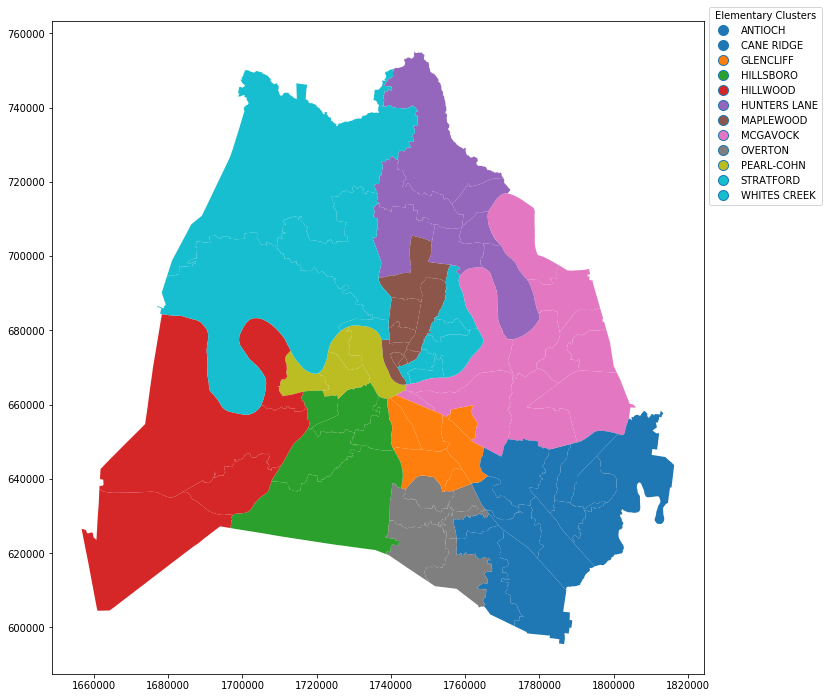

In [50]:
leg_kwds = {'title': 'Elementary Clusters', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

elementary_zones.plot(column = 'CLUS_NAME', legend = True, 
                      legend_kwds = leg_kwds, figsize=(12, 12));

In [51]:
print(elementary_zones.crs)
elementary_zones.head()

{'init': 'epsg:2274'}


,SCHOOL_NAM,CLUS_NAME,geometry
0,Amqui Elementary School,HUNTERS LANE,"POLYGON ((1758732.590688393 703791.2499575615,..."
1,Lakeview Elementary School,ANTIOCH,"POLYGON ((1784016.984017134 633991.7140319794,..."
2,Bellshire Elementary School,HUNTERS LANE,"POLYGON ((1736868.540912643 713552.5204612315,..."
3,Norman Binkley Elementary School,OVERTON,"POLYGON ((1750474.399855718 631955.3001258075,..."
4,Jones Paideia Elementary Magnet School,PEARL-COHN,"POLYGON ((1735612.998148143 680157.1942074001,..."


In [52]:
elementary_zones = elementary_zones.to_crs('EPSG:2274')

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [53]:
print(elementary_zones.crs)
elementary_zones.head()

EPSG:2274


,SCHOOL_NAM,CLUS_NAME,geometry
0,Amqui Elementary School,HUNTERS LANE,"POLYGON ((1758732.590688393 703791.2499575615,..."
1,Lakeview Elementary School,ANTIOCH,"POLYGON ((1784016.984017134 633991.7140319794,..."
2,Bellshire Elementary School,HUNTERS LANE,"POLYGON ((1736868.540912643 713552.5204612315,..."
3,Norman Binkley Elementary School,OVERTON,"POLYGON ((1750474.399855718 631955.3001258075,..."
4,Jones Paideia Elementary Magnet School,PEARL-COHN,"POLYGON ((1735612.998148143 680157.1942074001,..."


In [54]:
elementary_zones = elementary_zones.to_crs('EPSG:4326')
print(elementary_zones.crs)
elementary_zones.head()

EPSG:4326


,SCHOOL_NAM,CLUS_NAME,geometry
0,Amqui Elementary School,HUNTERS LANE,POLYGON ((36.26467798679479 -86.71153183637063...
1,Lakeview Elementary School,ANTIOCH,POLYGON ((36.07341833983102 -86.62425951818832...
2,Bellshire Elementary School,HUNTERS LANE,POLYGON ((36.29103089898521 -86.78595768127346...
3,Norman Binkley Elementary School,OVERTON,POLYGON ((36.06718296499919 -86.73770586040993...
4,Jones Paideia Elementary Magnet School,PEARL-COHN,POLYGON ((36.19927152863863 -86.78930381872759...


In [55]:
# elementary_zones.geometry = elementary_zones.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))


In [1]:
print(elementary_zones.crs)
elementary_zones.head()

NameError: name 'elementary_zones' is not defined

In [57]:
elementary_zones.to_file('elementary_zones.geojson',  driver='GeoJSON' )

/opt/anaconda3/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
